# Plot Model Time Series

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rasterio
import rioxarray 
import hvplot.xarray 
from rasterio.warp import reproject, Resampling
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# set temperature threshold. choices: [0,1,2]
threshold_0 = 0
threshold_1 = 1
threshold_2 = 2
# set day. choices: ['20160329','20160208']
day_str_1 = '20160329'
day_str_2 = '20160208'
day_num_1 = 180
day_num_2 = 130
# set stat. choices: [0,1,2,3,4] represent ensemble [mean,std,median,25%,75%]
stat = 2

In [3]:
#open model run netcdf
xds_0 = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold_0}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")
xds_1 = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold_1}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")
xds_2 = xr.open_dataset(f"../SnowHydro/data/Model_Output/{threshold_2}K_Threshold/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc")

In [21]:
xds_0

<xarray.Dataset>
Dimensions:    (Day: 366, Latitude: 225, Longitude: 225, Stats: 5)
Coordinates:
  * Latitude   (Latitude) float32 48.0 47.99 47.99 47.98 ... 47.01 47.01 47.0
  * Longitude  (Longitude) float32 -124.0 -124.0 -124.0 ... -123.0 -123.0 -123.0
Dimensions without coordinates: Day, Stats
Data variables:
    SWE_Post   (Day, Stats, Longitude, Latitude) float32 ...
    SCA_Post   (Day, Stats, Longitude, Latitude) float32 ...

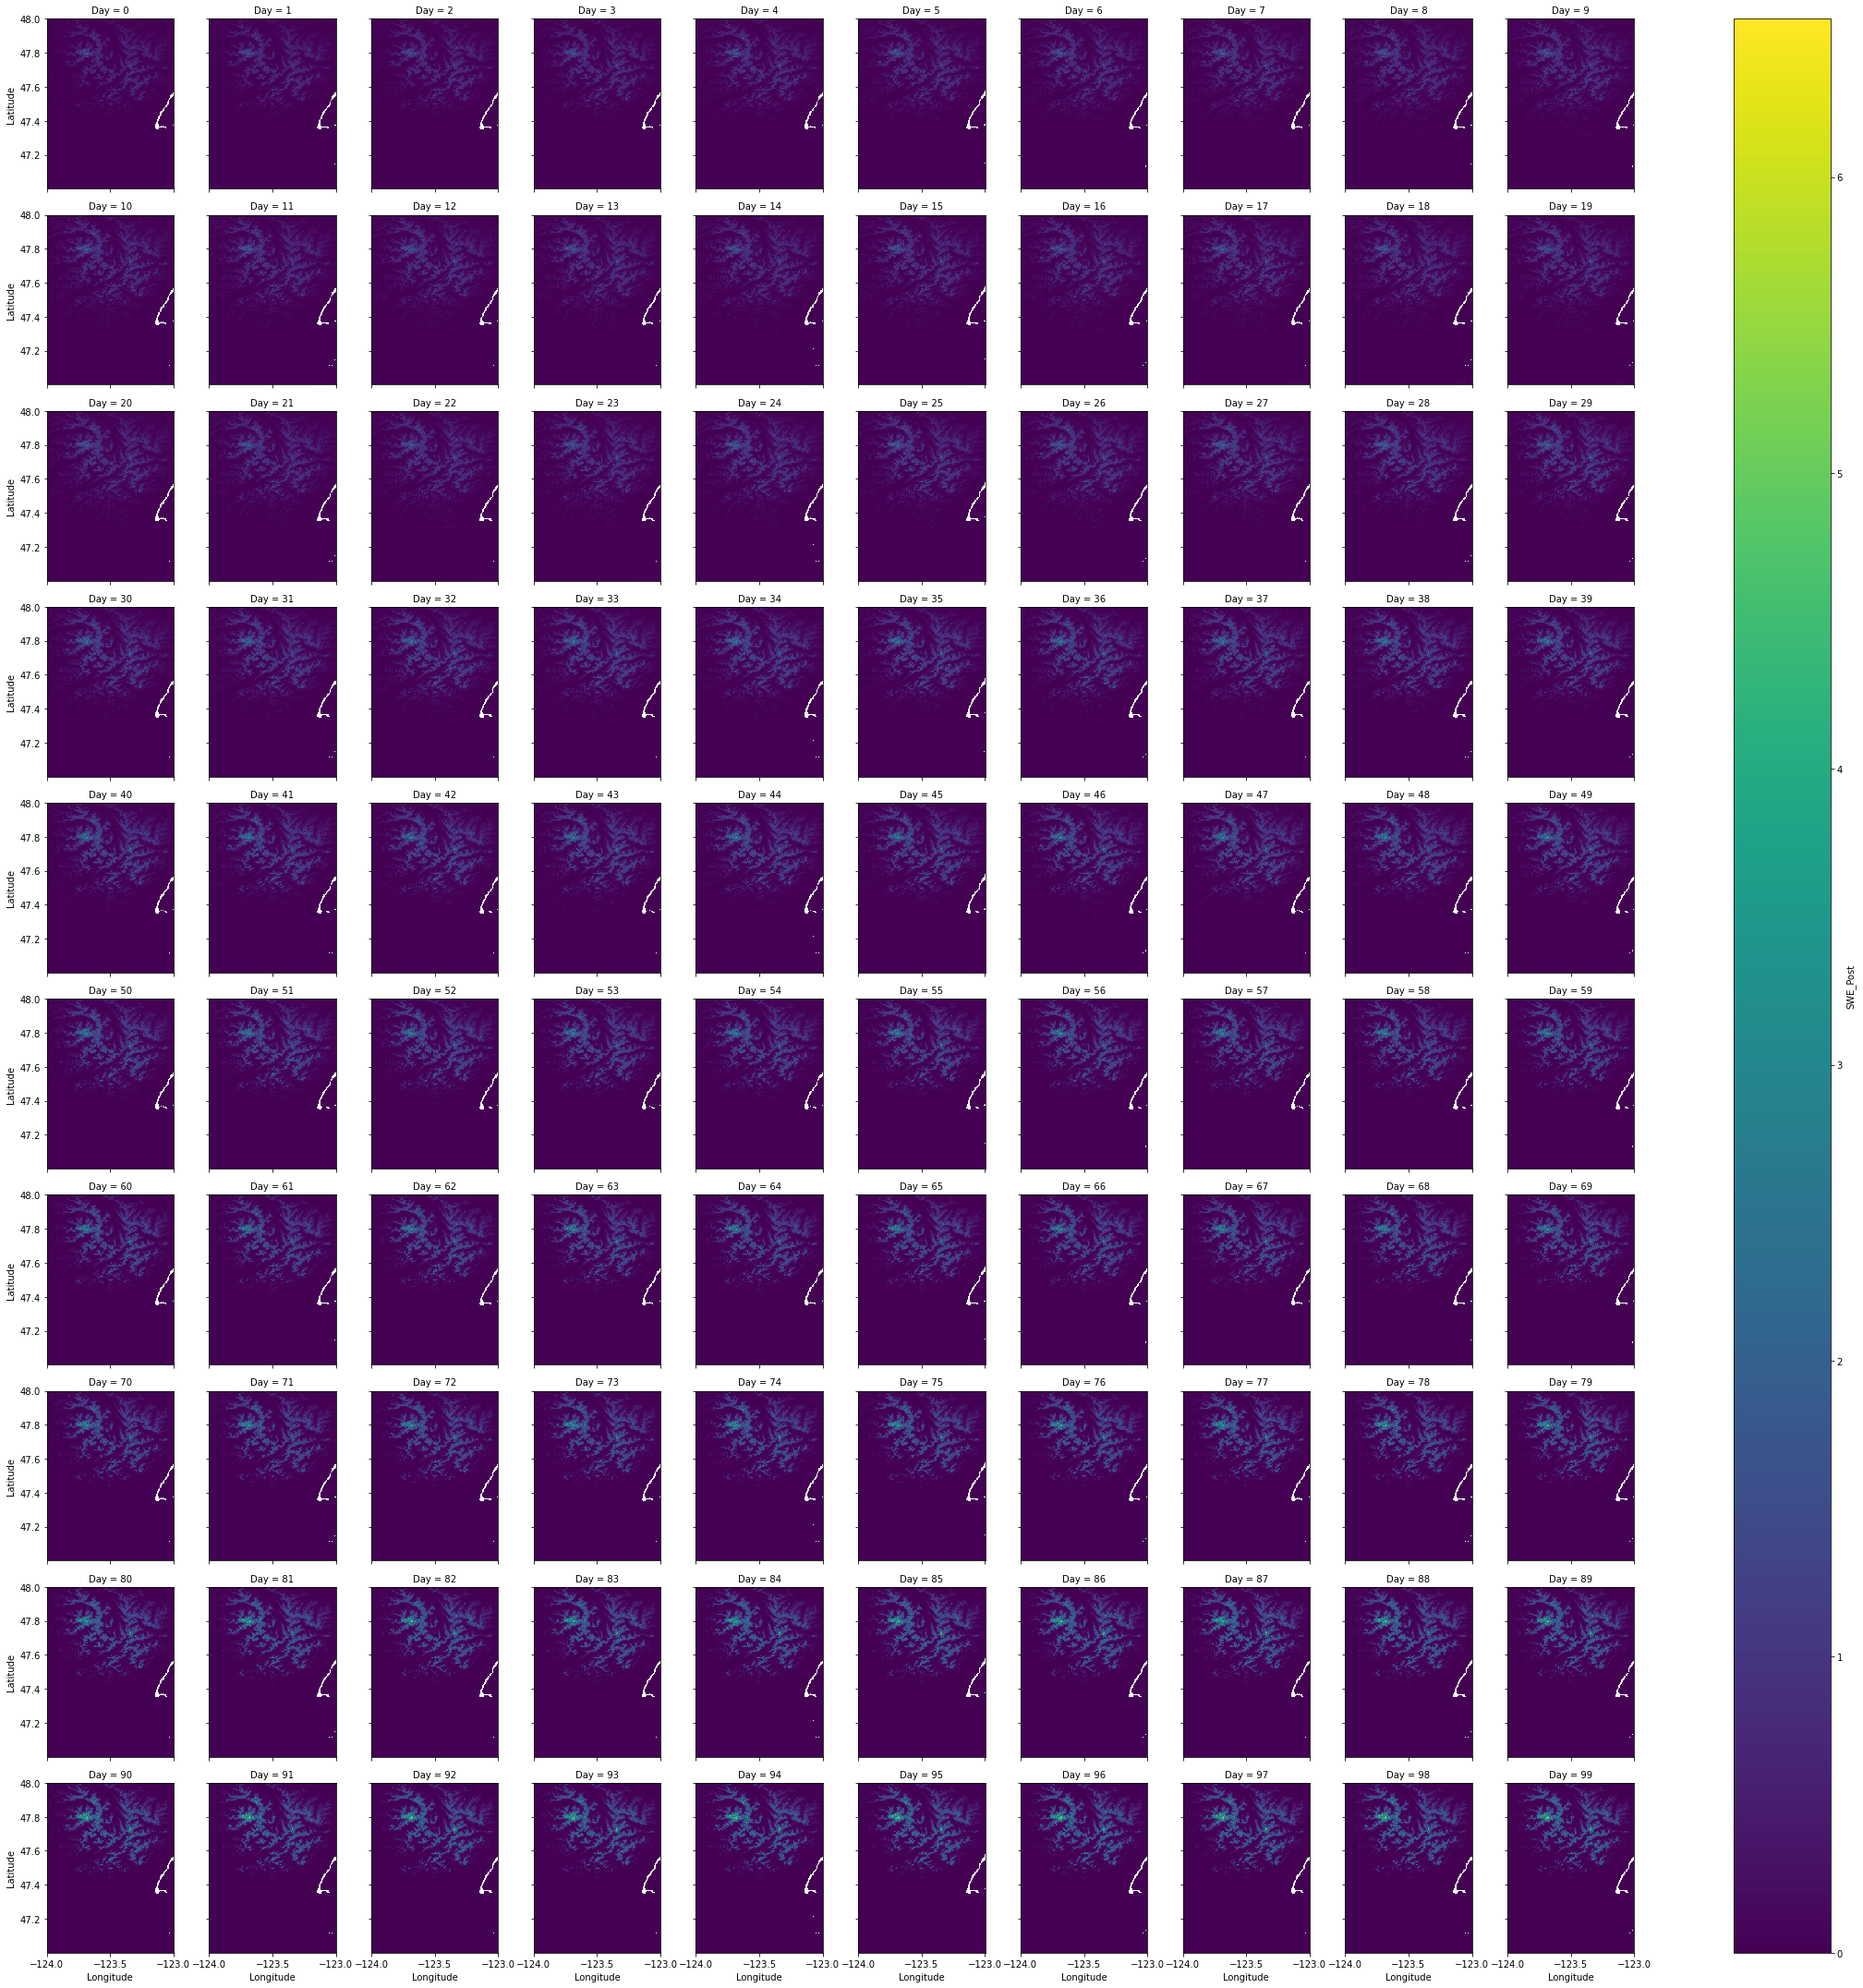

In [26]:
xds_0['SWE_Post'].sel(Stats=2).isel(Day=slice(80,180)).plot(x='Longitude',y='Latitude',col='Day',col_wrap=10)